 # Getting Started

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn
import numpy as np

In [2]:
data = pd.read_csv('listings.csv')

In [3]:
data.tail()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
49743,32848199,"Cozy, Confortable and Nice place in Bay Ridge",246910562,Stefany,Brooklyn,Bay Ridge,40.63114,-74.02529,Private room,53,1,0,NaN,NaN,1,174
49744,32849284,Chic Studio in Williamsburg,6657574,Gene,Brooklyn,Williamsburg,40.71262,-73.95842,Entire home/apt,149,2,0,NaN,NaN,3,346
49745,32849527,Designer Apt Next 538 acres Park Near JFK and LG,151282236,Sigrid,Queens,Richmond Hill,40.70162,-73.84071,Entire home/apt,95,1,0,NaN,NaN,1,79
49746,32850062,Master Bedroom for 3 guests heart of East Vill...,95892016,Leonora,Manhattan,Stuyvesant Town,40.73008,-73.97776,Private room,150,1,0,NaN,NaN,7,104
49747,32858895,Live like a true New Yorker!,8454981,Artez,Manhattan,Hell's Kitchen,40.75711,-73.99796,Entire home/apt,150,3,0,NaN,NaN,1,47


In [80]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49748 entries, 0 to 49747
Data columns (total 18 columns):
id                                49748 non-null int64
name                              49731 non-null object
host_id                           49748 non-null int64
host_name                         49740 non-null object
neighbourhood_group               49748 non-null object
neighbourhood                     49748 non-null object
latitude                          49748 non-null float64
longitude                         49748 non-null float64
room_type                         49748 non-null object
price                             49748 non-null int64
minimum_nights                    49748 non-null int64
number_of_reviews                 49748 non-null int64
last_review                       39260 non-null datetime64[ns]
reviews_per_month                 39260 non-null float64
calculated_host_listings_count    49748 non-null int64
availability_365                  49748 non-nu

## Data mapping

In [81]:
data['last_review'] = data['last_review'].map(pd.to_datetime)

In [82]:
def get_m(dt):
    return dt.month

data['month'] = data['last_review'].map(get_m)

In [83]:
def get_y(dt):
    return dt.year

data['Year'] = data['last_review'].map(get_y)

In [84]:
data.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,month,Year
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.23,6,365,10.0,2018.0
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,43,2019-01-02,0.38,2,365,1.0,2019.0
2,3330,++ Brooklyn Penthouse Guestroom ++,4177,Jbee,Brooklyn,Williamsburg,40.70856,-73.94236,Private room,70,5,39,2018-12-07,0.35,3,217,12.0,2018.0
3,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaT,NaN,1,365,NaN,NaN
4,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,239,2019-03-03,4.43,1,164,3.0,2019.0


## Creating graphs

In [85]:
def count_rows(rows):
    return len(rows)

by_month = data.groupby('month').apply(count_rows)
by_month

month
1.0     8131
2.0     9485
3.0     3136
4.0      785
5.0     1239
6.0     1252
7.0     1478
8.0     2161
9.0     2234
10.0    2568
11.0    2270
12.0    4521
dtype: int64

In [12]:
def count_rows(rows):
    return len(rows)

by_year = data.groupby('Year').apply(count_rows)
by_year

Year
2010.0        1
2011.0        8
2012.0       26
2013.0       53
2014.0      218
2015.0     1474
2016.0     2967
2017.0     3715
2018.0    12464
2019.0    18334
dtype: int64

<function matplotlib.pyplot.show(*args, **kw)>

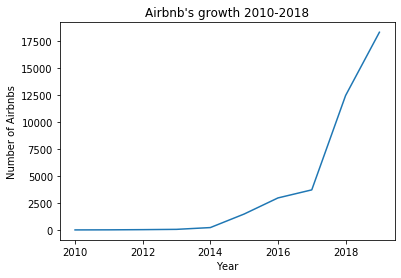

In [79]:
plt.plot(by_year)
plt.xlabel('Year')
plt.ylabel('Number of Airbnbs')
plt.title('Airbnb\'s growth 2010-2018')
plt.show

In [16]:
year_month= data.groupby('Year month'.split()).apply(count_rows).unstack()
year_month.fillna(0)

month,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0
Year,,,,,,,,,,,,
2010.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2011.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,3.0,0.0,0.0,2.0
2012.0,2.0,0.0,0.0,0.0,1.0,2.0,2.0,4.0,7.0,1.0,3.0,4.0
2013.0,5.0,0.0,1.0,5.0,6.0,4.0,3.0,2.0,10.0,6.0,4.0,7.0
2014.0,12.0,3.0,2.0,16.0,20.0,21.0,9.0,40.0,32.0,31.0,14.0,18.0
2015.0,56.0,15.0,23.0,26.0,83.0,90.0,111.0,217.0,223.0,245.0,158.0,227.0
2016.0,368.0,76.0,144.0,146.0,250.0,267.0,320.0,390.0,304.0,286.0,204.0,212.0
2017.0,386.0,76.0,116.0,183.0,293.0,291.0,324.0,428.0,433.0,404.0,309.0,472.0
2018.0,663.0,195.0,274.0,408.0,585.0,577.0,709.0,1080.0,1222.0,1595.0,1577.0,3579.0


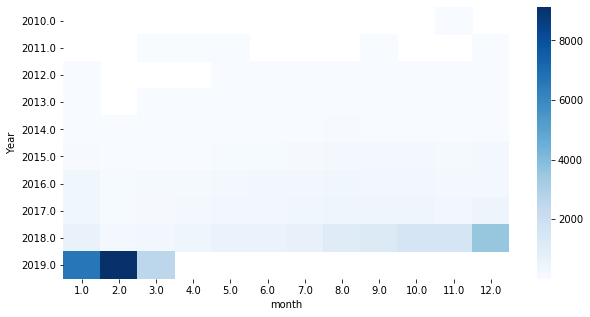

In [39]:
fig, ax = plt.subplots(figsize=(10,5))
seaborn.heatmap(year_month, cmap = 'Blues')

In [17]:
def count_rows(rows):
    return len(rows)

by = data.groupby('neighbourhood_group').apply(count_rows)
by_loc = pd.DataFrame(by)
by_loc.rename(columns={0 :'airbnbs'}, inplace=True )
by_loc

,airbnbs
neighbourhood_group,
Bronx,1001
Brooklyn,20312
Manhattan,22559
Queens,5525
Staten Island,351


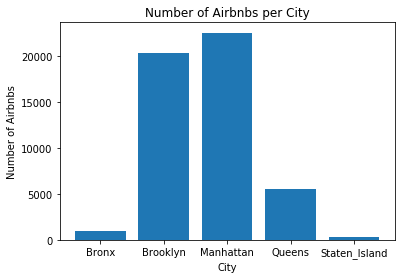

In [18]:
plt.bar(range(0,5), by)
plt.xticks(range(0,5), 'Bronx Brooklyn Manhattan Queens Staten_Island'.split())
plt.title('Number of Airbnbs per City')
plt.ylabel('Number of Airbnbs')
plt.xlabel('City')
plt.show()

In [98]:
Manhattan = data[data.neighbourhood_group == 'Manhattan']
Brooklyn = data[data.neighbourhood_group == 'Brooklyn']
Queens = data[data.neighbourhood_group == 'Queens']
Bronx = data[data.neighbourhood_group == 'Bronx']
Staten_Island = data[data.neighbourhood_group == 'Staten Island']
Manhattan

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,month,Year,totalprice,minrevenue
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,43,2019-01-02,0.38,2,365,1.0,2019.0,225,225
3,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaT,NaN,1,365,NaN,NaN,450,450
5,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.11,1,12,11.0,2018.0,800,800
6,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,185,2,70,2018-12-02,0.58,1,18,12.0,2018.0,370,370
8,5178,Large Furnished Room Near B'way,8967,Shunichi,Manhattan,Hell's Kitchen,40.76489,-73.98493,Private room,79,2,415,2019-02-17,3.47,1,158,2.0,2019.0,158,158
9,5203,Cozy Clean Guest Room - Family Apt,7490,MaryEllen,Manhattan,Upper West Side,40.80178,-73.96723,Private room,79,2,118,2017-07-21,1.02,1,0,7.0,2017.0,158,158
10,5216,Super Large APT,7510,Tonya,Manhattan,Flatiron District,40.74357,-73.98999,Entire home/apt,126,26,35,2018-12-31,0.29,5,365,12.0,2018.0,3276,3276
11,5238,Cute & Cozy Lower East Side 1 bdrm,7549,Ben,Manhattan,Chinatown,40.71344,-73.99037,Entire home/apt,150,1,155,2019-01-30,1.34,4,220,1.0,2019.0,150,150
12,5295,Beautiful 1br on Upper West Side,7702,Lena,Manhattan,Upper West Side,40.80316,-73.96545,Entire home/apt,135,5,45,2019-03-02,0.38,1,43,3.0,2019.0,675,675
13,5435,Upper West Side-Unique One Bedroom,7987,Carla,Manhattan,Upper West Side,40.80155,-73.97000,Entire home/apt,145,7,26,2018-08-31,0.22,1,294,8.0,2018.0,1015,1015


In [21]:
mt = data.groupby('neighbourhood_group')["price"].mean()
meantodo = pd.DataFrame(mt)
meantodo

,price
neighbourhood_group,
Bronx,85.859141
Brooklyn,121.005760
Manhattan,194.683053
Queens,96.578824
Staten Island,111.931624


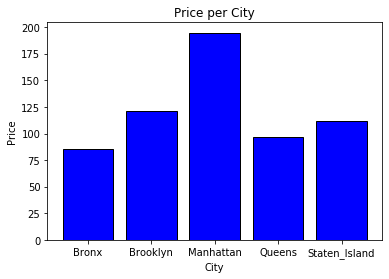

In [22]:
plt.bar(range(0,5), mt, edgecolor="black",color='blue')
plt.title('Price per City')
plt.ylabel('Price')
plt.xlabel('City')
plt.xticks(range(0,5), 'Bronx Brooklyn Manhattan Queens Staten_Island'.split(),color='Black')
plt.show()

In [23]:
merged_left = pd.merge(left=by_loc,right=meantodo, how='left', left_on='neighbourhood_group', right_on='neighbourhood_group')
newtable = pd.DataFrame(merged_left)
newtable

,airbnbs,price
neighbourhood_group,,
Bronx,1001,85.859141
Brooklyn,20312,121.005760
Manhattan,22559,194.683053
Queens,5525,96.578824
Staten Island,351,111.931624


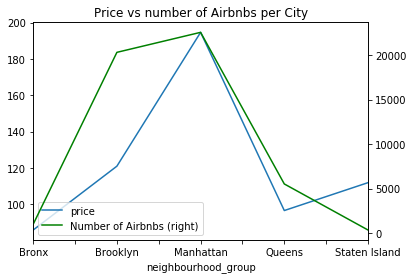

In [24]:
newtable.price.plot(legend=True)
newtable.airbnbs.plot(secondary_y= True, style= 'g', title='Price vs number of Airbnbs per City',legend=True, label='Number of Airbnbs')

In [25]:
SIRT = Staten_Island.groupby('room_type').apply(count_rows)
StatenIRT = pd.DataFrame(SIRT)
StatenIRT.rename(columns={0 :'Staten Island'}, inplace=True )

In [26]:
QRT = Queens.groupby('room_type').apply(count_rows)
QueensRT = pd.DataFrame(QRT)
QueensRT.rename(columns={0 :'Queens'}, inplace=True )

In [27]:
MRT = Manhattan.groupby('room_type').apply(count_rows)
ManhattanRT = pd.DataFrame(MRT)
ManhattanRT.rename(columns={0 :'Manhattan'}, inplace=True )

In [28]:
BRT = Bronx.groupby('room_type').apply(count_rows)
BronxRT = pd.DataFrame(BRT)
BronxRT.rename(columns={0 :'Bronx'}, inplace=True )

In [64]:
ByRT = Brooklyn.groupby('room_type').apply(count_rows)
BrookRT = pd.DataFrame(ByRT)
BrookRT.rename(columns={0 :'Brooklyn'}, inplace=True )

In [30]:
merged1 = pd.merge(right=BrookRT, left=BronxRT, how='left', left_on='room_type', right_on='room_type')
merged2 = pd.merge(left=merged1, right=ManhattanRT, how='left', left_on='room_type', right_on='room_type')
merged3 = pd.merge(left=merged2, right=QueensRT, how='left', left_on='room_type', right_on='room_type')
RoomType = pd.merge(left=merged3, right=StatenIRT, how='left', left_on='room_type', right_on='room_type')
RoomType_City = RoomType.transpose()
RoomType_City

room_type,Entire home/apt,Private room,Shared room
Bronx,339,616,46
Brooklyn,9568,10346,398
Manhattan,13985,8106,468
Queens,2008,3322,195
Staten Island,161,188,2


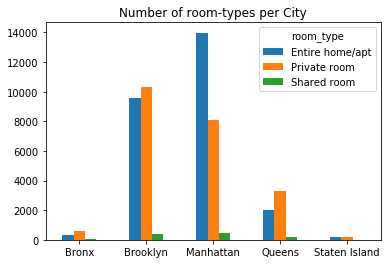

In [50]:
RoomType_City.plot.bar(rot=0, title='Number of room-types per City')


In [69]:
SIPRT = Staten_Island.groupby('room_type')["price"].mean()
StatenPRT = pd.DataFrame(SIPRT)
StatenPRT.rename(columns={'price' :'Staten Island'}, inplace=True )

QPRT = Queens.groupby('room_type')["price"].mean()
QueensPRT = pd.DataFrame(QPRT)
QueensPRT.rename(columns={'price':'Queens'}, inplace=True )

BPRT = Bronx.groupby('room_type')["price"].mean()
BronxPRT = pd.DataFrame(BPRT)
BronxPRT.rename(columns={'price':'Bronx'}, inplace=True )

BroPRT = Brooklyn.groupby('room_type')["price"].mean()
BrookPRT = pd.DataFrame(BroPRT)
BrookPRT.rename(columns={'price':'Brooklyn'}, inplace=True )

MPRT = Manhattan.groupby('room_type')["price"].mean()
ManPRT = pd.DataFrame(MPRT)
ManPRT.rename(columns={'price':'Manhattan'}, inplace=True )

In [70]:
mergedP1 = pd.merge(right=BrookPRT, left=BronxPRT, how='left', left_on='room_type', right_on='room_type')
mergedP2 = pd.merge(left=mergedP1, right=ManPRT, how='left', left_on='room_type', right_on='room_type')
mergedP3 = pd.merge(left=mergedP2, right=QueensPRT, how='left', left_on='room_type', right_on='room_type')
RoomTypeP = pd.merge(left=mergedP3, right=StatenPRT, how='left', left_on='room_type', right_on='room_type')
RoomTypeP_City = RoomTypeP.transpose()
RoomTypeP_City

room_type,Entire home/apt,Private room,Shared room
Bronx,121.241888,67.383117,72.521739
Brooklyn,174.552885,74.033733,54.758794
Manhattan,244.614087,114.730693,87.435897
Queens,142.860060,70.164058,70.000000
Staten Island,172.074534,60.712766,85.000000


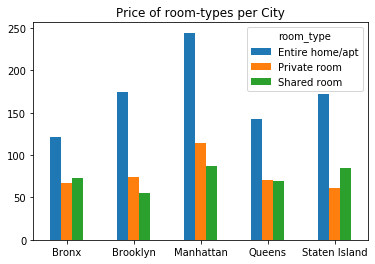

In [71]:
RoomTypeP_City.plot.bar(rot=0, title='Price of room-types per City')

In [95]:
data['minrevenue'] =  data['price']*data['minimum_nights']

In [108]:
minR = data.groupby('neighbourhood_group')['minrevenue'].mean()
minRev = pd.DataFrame(minR)
minRev.rename(columns={'minrevenue' :'Minimum Revenue'}, inplace=True )
minRev

,Minimum Revenue
neighbourhood_group,
Bronx,391.196803
Brooklyn,735.417340
Manhattan,1792.045924
Queens,770.304796
Staten Island,436.102564


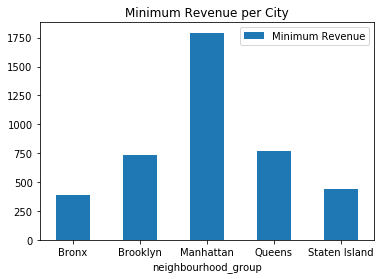

In [115]:
minRev.plot.bar(rot=0, title='Minimum Revenue per City')